In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib


import os,sys
from importlib import reload
import copy
sys.path.append("../tracker")

In [8]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes as DataTypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '../tracker\\utilities.py'>

In [9]:
hits=joblib.load("hits_example.joblib")
hits[:10]

[Hit(x=241.62934581783023, y=9894.0, z=12456.75, t=40.91365706617539, x_err=14.132352000025548, y_err=0, z_err=1.299038105676658, t_err=1, layer=0, ind=0),
 Hit(x=259.25, y=9975.599999999999, z=12450.5, t=45.79668867914941, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=1, ind=1),
 Hit(x=221.49664808213277, y=10057.2, z=12461.25, t=48.189471653643565, x_err=14.132352000025548, y_err=0, z_err=1.299038105676658, t_err=1, layer=2, ind=2),
 Hit(x=227.75, y=10138.8, z=12450.5, t=50.295569678622876, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=3, ind=3)]

In [10]:
reload(TF)

<module 'trackfinder' from '../tracker\\trackfinder.py'>

In [11]:
# tf = TF.TrackFinder(method="recursive", debug=True)
tf = TF.TrackFinder(method="greedy", debug=True)
# %timeit -n 3 tf.run(hits)
tracks = tf.run(hits)
print(tracks)
joblib.dump(tracks, "tracks_example.joblib")
    

[Track(x0=274.2196119526758, y0=9894.0, z0=12456.768104297438, t=41.71806864762234, Ax=-0.18964018097796365, Ay=1, Az=0.026258905960041642, At=0.0374246578576429, cov=array([[ 4.12807664e+00,  0.00000000e+00,  0.00000000e+00,
        -2.02527097e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.68043024e+00,  0.00000000e+00,
         0.00000000e+00, -1.02541541e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  7.00000000e-01,
         0.00000000e+00,  0.00000000e+00, -3.67647059e-03],
       [-2.02527097e-02,  0.00000000e+00,  0.00000000e+00,
         1.24619542e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.02541541e-02,  0.00000000e+00,
         0.00000000e+00,  1.24619542e-04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.67647059e-03,
         0.00000000e+00,  0.00000000e+00,  3.00365244e-05]]), chi2=11.199094002959015, ind=0, hits=[0, 1, 2, 3], hits_filtered=[[274.2196119526758, 9894.0, 12456.768104297438, 41.

['tracks_example.joblib']

In [12]:
print(len(tracks))
# tracks

1


In [13]:
steel_height=0.03 #m
Box_IP_Depth=85.47#m
def coord_det2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """
    return np.array([vector_xyz[0]+119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_sim2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """
    return np.array([vector_xyz[1],      -vector_xyz[2]+Box_IP_Depth, vector_xyz[0]])*100 # turn to cm
def coord_det2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """    
    return coord_sim2cms(coord_det2sim(vector_xyz))

def coord_sim2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[0]-119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_cms2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return coord_sim2det(coord_cms2sim(vector_xyz))

def coord_cms2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[2],      vector_xyz[0], -vector_xyz[1]+Box_IP_Depth*100])/100 # turn to m    
    

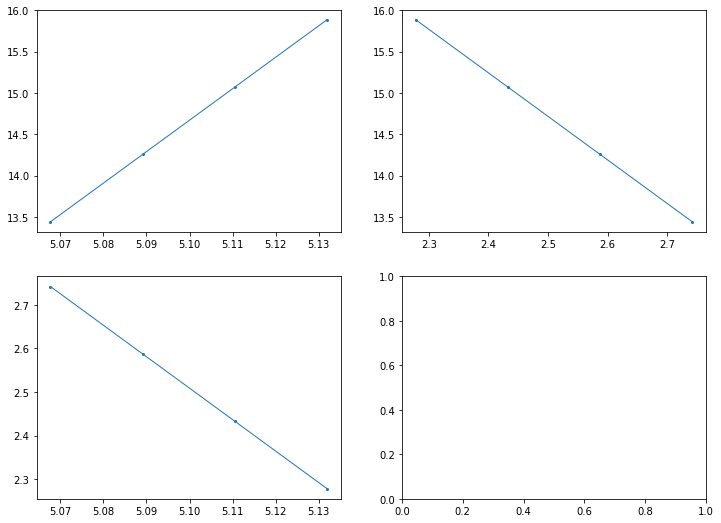

In [14]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)

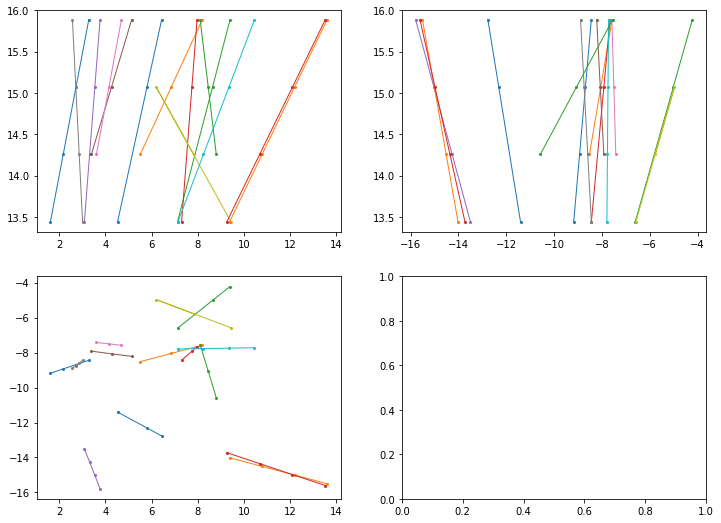

In [65]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)